# Projeto Prático #4 
## Multilayer Perceptron + GridSearchCV + WheatSeedsDataset


Este Projeto Prático tem o objetivo de conduzir um processo de Aprendizado de Máquina com a tarefa de Classificação Multiclasse que utilize Redes Neurais Artificiais do tipo Multilayer Perceptron para solucionar o problema de classificação de três variedades de trigo (Kama, Rosa, Canadian) a partir dos seguintes dados:
    
    
    Área, Perímetro, Compactude, Comprimento, Largura, Coeficiente de Assimetria e Comprimento do Sulco da Semente
    
estes, encontrados no [WheatSeedsDataset](https://archive.ics.uci.edu/ml/datasets/seeds#).

Com intuito de otimização na busca por melhores parâmetro e hiperparâmetros da RNA, neste projeto, será utilizada uma Busca em Grade que irá variar a função de ativação e número de neurônios nas camadas ocultas

Para a avaliação das RNAs encontradas, a Busca em Grade considerará uma Validação Cruzada com k=3 folds e a acurácia como métrica de desempenho.

Alunos: 
    - Jean Phelipe de Oliveira Lima - 1615080096
    - Rodrigo Gomes de Souza - 1715310022

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from math import ceil
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Leitura do WhatSeedsDataset

In [2]:
dataset = pd.read_csv('WheatSeedDataset.csv', sep='\t')
dataset.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Regra da Pirâmide Geométrica

Implementação da Regra da Pirâmide Geométrica para determinação da quantidade de Neurônios Ocultos

        Nh = α·√(Ni·No) ; Nh = Número de Neurônios Ocultos
                          Ni = Número de Neurônios de Entrada
                          No = Número de Neurônios de Saída
                          α  = Constante (Para o problema em questão, serão adotados α = [0.5, 2, 3])

In [3]:
def piramide_geometrica(ni, no, alfa):
    nh = alfa*((ni*no)**(1/2))
    return ceil(nh)

##  Distribuição dos Neurônios em duas Camadas Ocultas

Função para gerar todas as possíveis 2-tuplas que representam o número de neurônios distribuídos por duas camadas ocultas de uma RNA do tipo MLP, dado o número de neurônios ocultos obtidos previamente pela Regra da Pirâmide Geométrica.

In [4]:
def hidden_layers(layers, nh):
    for i in range(1, nh):
        neurons_layers = (i, nh-i)
        layers.append(neurons_layers)
    return layers

### Criação de Lista de Camadas Ocultas a Partir da Regra da Pirâmide Geométrica

In [5]:
num_in = 7
num_out = 3
alpha = [0.5, 2, 3]
layers = []

In [6]:
for i in range(len(alpha)):
    nh = piramide_geometrica(num_in, num_out, alpha[i])
    print('Para α = %.1f, Nh = %d'%(alpha[i],nh))
    hidden_layers(layers, nh)#insere cada possibilidade de camadas ocultas, dado o numero de neurônios, na lista 'layers'
    
print()
print('Distribuições de Camadas Ocultas:\n')
for i in layers:
    print(i)

Para α = 0.5, Nh = 3
Para α = 2.0, Nh = 10
Para α = 3.0, Nh = 14

Distribuições de Camadas Ocultas:

(1, 2)
(2, 1)
(1, 9)
(2, 8)
(3, 7)
(4, 6)
(5, 5)
(6, 4)
(7, 3)
(8, 2)
(9, 1)
(1, 13)
(2, 12)
(3, 11)
(4, 10)
(5, 9)
(6, 8)
(7, 7)
(8, 6)
(9, 5)
(10, 4)
(11, 3)
(12, 2)
(13, 1)


## Busca em Grade

São definidos:
    - Parâmetros que devem variar na busca em grade;
    - Número de Folds para validação cruzada;
    - Métrica de desempenho a ser considerada;
    
    
Além disso, é definido o método de otimização a ser utilizado: ***solver = lbfgs***, uma vez que dataset utilizado contém poucos exemplos para cada classe.

In [7]:
parameters = {'solver': ['lbfgs'], 
              'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'hidden_layer_sizes': layers,
              'max_iter':[1000],
              'learning_rate': ['adaptive', 'constant']}

gs = GridSearchCV(MLPClassifier(), 
                  parameters, 
                  cv=3, 
                  scoring='accuracy')

In [8]:
x = dataset.drop(['Type'], axis = 1) #Atributos preditores
y = dataset.Type #Atributo Alvo

### Treinamento 

Treinamento de todas as combinações de RNAs definidas no GridSearchCV()

In [9]:
gs.fit(x, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'solver': ['lbfgs'], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'hidden_layer_sizes': [(1, 2), (2, 1), (1, 9), (2, 8), (3, 7), (4, 6), (5, 5), (6, 4), (7, 3), (8, 2), (9, 1), (1, 13), (2, 12), (3, 11), (4, 10), (5, 9), (6, 8), (7, 7), (8, 6), (9, 5), (10, 4), (11, 3), (12, 2), (13, 1)], 'max_iter': [1000], 'learning_rate': ['adaptive', 'constant']},
       pre_dispatch='2*n_jobs', refit=True

# Resultados

### Acurácia e Parâmetros do melhor modelo:

In [10]:
#Acurácia para o conjunto de testes
print('Acurácia média para os 3 splits de teste:',gs.best_score_)

print('\nParâmetros:')
for key in gs.best_params_.keys():
    print('\t',key, ': ', gs.best_params_[key])

Acurácia média para os 3 splits de teste: 0.9333333333333333

Parâmetros:
	 activation :  identity
	 hidden_layer_sizes :  (5, 5)
	 learning_rate :  adaptive
	 max_iter :  1000
	 solver :  lbfgs


### Dataframe - Desempenho de cada RNA

In [11]:
results = pd.DataFrame(gs.cv_results_)
analysis_dict = {}

analysis_dict['hidden_layer_sizes'] = results['param_hidden_layer_sizes']
analysis_dict['activation'] = results['param_activation']
analysis_dict['learning_rate'] = results['param_learning_rate']
analysis_dict['mean_test_accuracy'] = results['mean_test_score']

analysis_dataset = pd.DataFrame(analysis_dict)
analysis_dataset.head(10)

,hidden_layer_sizes,activation,learning_rate,mean_test_accuracy
0,"(1, 2)",identity,adaptive,0.833333
1,"(1, 2)",identity,constant,0.852381
2,"(2, 1)",identity,adaptive,0.842857
3,"(2, 1)",identity,constant,0.847619
4,"(1, 9)",identity,adaptive,0.852381
5,"(1, 9)",identity,constant,0.861905
6,"(2, 8)",identity,adaptive,0.914286
7,"(2, 8)",identity,constant,0.909524
8,"(3, 7)",identity,adaptive,0.923810
9,"(3, 7)",identity,constant,0.900000


### Número de RNAs treinadas:

In [12]:
print("Total de RNAs:",len(results))

Total de RNAs: 192


### Top 10 - Melhores RNAs

Melhores RNAs para o problema, ordenadas pela acurácia.

In [60]:
top10 = analysis_dataset.sort_values('mean_test_accuracy', ascending=False)
top10.head(10)

,hidden_layer_sizes,activation,learning_rate,mean_test_accuracy
87,"(9, 5)",logistic,constant,0.933333
67,"(8, 2)",logistic,constant,0.933333
12,"(5, 5)",identity,adaptive,0.933333
17,"(7, 3)",identity,constant,0.928571
27,"(3, 11)",identity,constant,0.928571
31,"(5, 9)",identity,constant,0.928571
13,"(5, 5)",identity,constant,0.928571
36,"(8, 6)",identity,adaptive,0.928571
140,"(12, 2)",tanh,adaptive,0.923810
8,"(3, 7)",identity,adaptive,0.923810


### Análise de Desempenho

#### Baseado na Função de Ativação

In [21]:
identity = analysis_dataset['mean_test_accuracy'][analysis_dataset['activation']=='identity']
logistic = analysis_dataset['mean_test_accuracy'][analysis_dataset['activation']=='logistic']
relu = analysis_dataset['mean_test_accuracy'][analysis_dataset['activation']=='relu']
tanh = analysis_dataset['mean_test_accuracy'][analysis_dataset['activation']=='tanh']

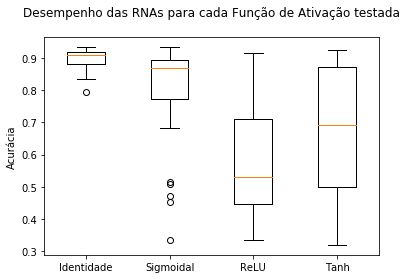

In [69]:
func = [list(identity), list(logistic), list(relu), list(tanh)]
activations = ['Identidade', 'Sigmoidal', 'ReLU', 'Tanh']
index = []
for i in range(len(activations)):
    index.append(i+1)


plt.boxplot(func)
plt.title('Desempenho das RNAs para cada Função de Ativação testada\n')
plt.ylabel('Acurácia')

plt.xticks(index, activations)

plt.show()

Através do gráfico acima, é possível perceber que a Função de Ativação Identidade é a função que teve melhor desempenho nas RNAs testadas, visto que as acurácias das Redes com esta função se concentram em torno de 0,9.
Por outro lado, as funções ReLU e Tangente Hiperbólica se mostraram bastante heterogêneas, para o problema, em relação à acurácia.

#### Baseado no learning_rate

In [40]:
adaptive = analysis_dataset['mean_test_accuracy'][analysis_dataset['learning_rate']=='adaptive']
constant = analysis_dataset['mean_test_accuracy'][analysis_dataset['learning_rate']=='constant']

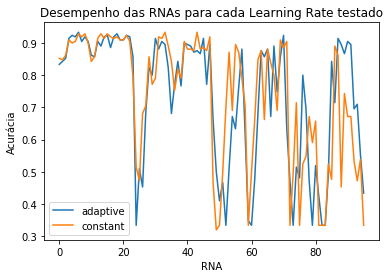

In [45]:
plt.plot(list(adaptive), label='adaptive')
plt.plot(list(constant), label = 'constant')
plt.legend()
plt.title('Desempenho das RNAs para cada Learning Rate testado')
plt.ylabel('Acurácia')
plt.xlabel('RNA')
plt.show()

O gráfico acima, indica que a escolha do learning_rate (adaptive ou constant) não exerce uma grande influência no desempenho da RNA, uma vez que as curvas de acurácia para as redes com cada um dos learning_rates são bem similares.